Support Vector Regression is a form of non-linear regression

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
data = pd.read_csv(r"C:\Users\Maria Munir Stokes\Documents\DS Courses\Udemy\drive-download-20200629T190417Z-001\Part 2 - Regression\Section 7 - Support Vector Regression (SVR)\Python\Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [11]:
# separating the dependent and independent variables
x = data.iloc[:,1].values
y = data.iloc[:,-1].values

print(x)
print(y)

[ 1  2  3  4  5  6  7  8  9 10]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [12]:
# as x and y have such different scales feature scaling is needed
# also unlike the method of linear regression which has coefficients that 
# deal with the different scales

# converting to a 2D array before scaling
y = y.reshape(len(y),1)
x = x.reshape(len(x),1)
# reshape(rows,columns)
print(x,y)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [13]:
# both the level and the salary need to be feature scaled
from sklearn.preprocessing import StandardScaler

# create two instances of the standard scaler class
# one for x and one for y as they have different means
scaler_x = StandardScaler()
scaler_y = StandardScaler()


In [14]:
# scale the independent variables (x: level)

x_scaled = scaler_x.fit_transform(x)
print(x_scaled)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [15]:
# scale the dependent variables (y: salary)
y_scaled = scaler_y.fit_transform(y)
print(y_scaled)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [18]:
# train svr model
from sklearn.svm import SVR

# create an instance
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(x_scaled, y_scaled)

C:\Users\Maria Munir Stokes\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [26]:
# using the trained data to predict new salary
# the feature scaling needs reversing

# use the same feature scaling on the value we want to predict
test_one_scaled = scaler_x.transform([[6.5]])
print(test_one_scaled)
scaled_prediction = svr_regressor.predict(test_one_scaled) # 2D array input is needed
prediction = scaler_y.inverse_transform(scaled_prediction)

print("prediction:", prediction[0] )

[[0.34815531]]
prediction: 170370.02040650236


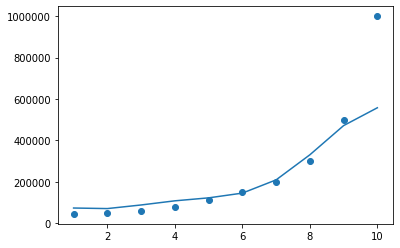

In [33]:
# visualising the results
plt.scatter(x, y)
# x against the prediction of the scaled x with the y transformation removed
plt.plot(x, scaler_y.inverse_transform(svr_regressor.predict(x_scaled)))

#plt.title('Support Vector Regression')
#plt.xticks(x)